In [4]:
import pandas as pd
from glob import glob
import os

In [5]:
base_folder = "Sensor Data"
for folder,_,files in os.walk(base_folder):
    for final in glob(f"{folder}/f*.csv"):
        print (final)

Sensor Data/10 Kid IoTool sensor data_ 2022-06-28-13-44-23/final.csv
Sensor Data/02 Kid IoTool sensor data_ 2022-06-28-13-34-41/final.csv
Sensor Data/08 09 Kid IoTool sensor data_ 2022-06-28-13-43-47/final.csv
Sensor Data/04 Kid IoTool sensor data_ 2022-06-28-13-36-45/final.csv
Sensor Data/01 Kid IoTool sensor data_ 2022-06-28-13-19-59/final.csv
Sensor Data/07 Kid IoTool sensor data_ 2022-06-28-13-42-19/final.csv
Sensor Data/06 Adult IoTool sensor data_ 2022-06-28-13-40-18/final.csv
Sensor Data/05 Adult IoTool sensor data_ 2022-06-28-13-39-40/final.csv
Sensor Data/03 Adult IoTool sensor data_ 2022-06-28-13-36-26/final.csv


In [8]:
df = pd.read_csv(final,index_col=0)

In [11]:
df = df.interpolate()
df.dropna(inplace=True)

In [12]:
df.head()

,0_col,1_col,2_col,3_col,4_col,5_col,6_col,7_col,8_col,9_col,10_col,11_col,12_col,13_col,14_col,15_col,16_col,17_col,18_col,19_col
time,,,,,,,,,,,,,,,,,,,,
2022-06-25 09:53:57.305,13.213878,0.463609,-0.022602,0.082698,0.495946,3.508476,0.011759,-0.117504,3.453896,-0.037351,9.960943,3.120253,9.164859,-0.052630,0.001374,9.311071,-0.047188,-20.712895,-5.20875,0.175452
2022-06-25 09:53:57.306,13.304290,0.513260,-0.018658,0.067781,0.491792,3.445665,0.011486,-0.118285,3.452818,-0.026819,10.002528,3.127613,9.165482,-0.043451,0.034999,9.376275,-0.047371,-20.693512,-5.18625,0.175242
2022-06-25 09:53:57.308,13.394702,0.595215,-0.014714,0.052864,0.487638,3.391228,0.011213,-0.119066,3.451740,-0.016287,9.948035,3.134972,9.166105,-0.034272,0.068623,9.333204,-0.047554,-20.674128,-5.16375,0.175032
2022-06-25 09:53:57.309,13.485113,0.671187,-0.010770,0.037946,0.483484,3.369693,0.010940,-0.119846,3.450662,-0.005755,9.842894,3.142332,9.166728,-0.025093,0.102247,9.223733,-0.047737,-20.654744,-5.14125,0.174822
2022-06-25 09:53:57.327,13.575525,0.716650,-0.006826,0.023029,0.479329,3.365505,0.010667,-0.120627,3.449584,0.004777,9.769604,3.149692,9.167351,-0.015914,0.135872,9.143574,-0.047921,-20.635361,-5.11875,0.174612


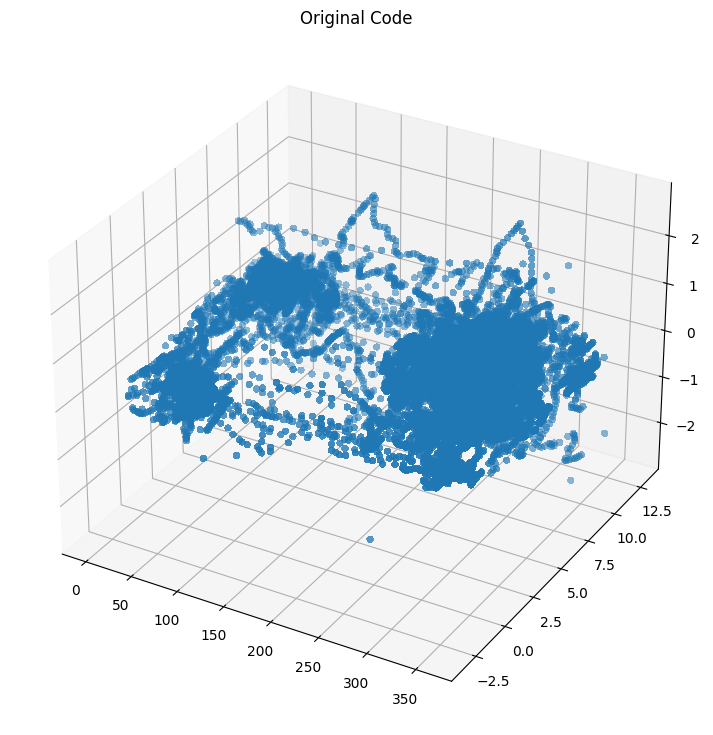

In [25]:
# 3-d plot 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.scatter3D(df['0_col'], df['1_col'], df['2_col'], #cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


plt.title('Original Code')
plt.show()

In [15]:
import numpy as np
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)

array([[ 0.70886129,  0.57562789,  0.42921793, ...,  0.27541086,
         0.42921793,  0.57562789],
       [ 0.57562789,  0.4208019 ,  0.2570234 , ...,  0.09046523,
         0.2570234 ,  0.4208019 ],
       [ 0.42921793,  0.2570234 ,  0.08068791, ..., -0.09334004,
         0.08068791,  0.2570234 ],
       ...,
       [ 0.27541086,  0.09046523, -0.09334004, ..., -0.26940744,
        -0.09334004,  0.09046523],
       [ 0.42921793,  0.2570234 ,  0.08068791, ..., -0.09334004,
         0.08068791,  0.2570234 ],
       [ 0.57562789,  0.4208019 ,  0.2570234 , ...,  0.09046523,
         0.2570234 ,  0.4208019 ]])

In [8]:
import streamlit as st
import plotly.express as px
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from glob import glob 
import pandas as pd
import os 

In [9]:
def create_dr(df):
    minn = df.index.values.min()
    maxx = df.index.values.max()
    date_range =pd.date_range(start=minn, end=maxx, freq='ms')

    return date_range

In [10]:
filepath  = "SensorData2"
ls = sorted( glob(f"{filepath}/[!T]*") )
ls = [ i for i in ls if 'iotool' in i.lower() ]
ls

['SensorData2/E01-IoTool sensor data_ 2022-08-31-13-52-03',
 'SensorData2/E02-IoTool sensor data_ 2022-08-31-13-50-40',
 'SensorData2/E03-IoTool sensor data_ 2022-08-31-13-50-25',
 'SensorData2/E04-IoTool sensor data_ 2022-08-31-13-50-06',
 'SensorData2/E05-IoTool sensor data_ 2022-08-31-13-49-39',
 'SensorData2/E06-IoTool sensor data_ 2022-08-31-13-49-21',
 'SensorData2/E07-IoTool sensor data_ 2022-08-31-13-49-03',
 'SensorData2/E08-IoTool sensor data_ 2022-08-31-13-48-37',
 'SensorData2/E09-IoTool sensor data_ 2022-08-31-13-48-11',
 'SensorData2/E10-IoTool sensor data_ 2022-08-31-13-54-19',
 'SensorData2/E11-IoTool sensor data_ 2022-08-31-13-51-07',
 'SensorData2/E12-IoTool sensor data_ 2022-08-31-13-51-22']

In [11]:

set_dt = False
for csv in glob(f"{kid}/[!f]*.csv"):
    sensor = csv.split("@")[0].split("/")[-1]
    df = pd.read_csv(csv, header=0, names=['date','time','val'])
    df['date'] =  df['date'] + " " + df['time']
    df = df.drop(labels = ['time'], axis = 1)
    df['date'] = pd.to_datetime( df['date'] )
    df.rename(columns={'val':sensor}, inplace=True)
    df = df.set_index(keys=['date'])
    # print ("------------",df.columns)
    if not set_dt:
        date_range = create_dr(df)
        final = pd.DataFrame(date_range, columns = ['date'])
        set_dt = True

    final = pd.merge_asof(final, df, on='date')
    
final = final.reindex(sorted(final.columns), axis=1)
final.set_index(keys=['date'], inplace=True)
final = final[['AccelerometerAbsolute','GyroscopeX','GyroscopeZ','GyroscopeY']].diff()#.plot(alpha = 0.6, figsize = (20,6), ax =  ax)

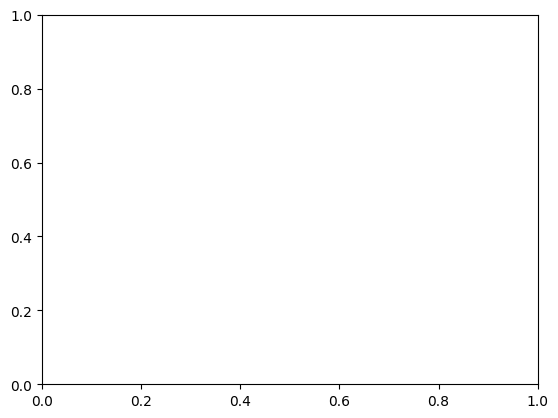

In [12]:


f,ax = plt.subplots()
# final = final[['AccelerometerAbsolute','GyroscopeX','GyroscopeZ','GyroscopeY']].diff()#.plot(alpha = 0.6, figsize = (20,6), ax =  ax)
fig = px.line(final, y = ['AccelerometerAbsolute','GyroscopeX','GyroscopeZ','GyroscopeY'])
# st.pyplot(f)
# st.plotly_chart(fig, use_container_width=True,  theme="streamlit")

In [ ]:
fig.show()